# Assignmnet 3 - Sama Amr

The dataset, police.csv, contains information about police stops, including details such as driver demographics (age, gender, race) and the outcomes of these stops (e.g., citations, warnings, arrests). It spans various stop types and violations, aiming to shed light on patterns and potential disparities in law enforcement activities.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import and explore dataset

In [2]:
df=pd.read_csv("police.csv")

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.tail()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Exploratory Data Analysis (EDA)

Summary statistics for numerical columns

In [5]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


Summary statistics for categorical columns

In [34]:
print(df.describe(include=['object']))

         stop_date stop_time driver_gender driver_race violation_raw  \
count        91741     91741         86406       86408         86408   
unique        3768      1436             2           5            12   
top     2012-01-11     11:00             M       White      Speeding   
freq            69       323         62895       62158         48463   

       violation         search_type stop_outcome is_arrested stop_duration  
count      86408                3196        86408       86408         86408  
unique         6                  24            6           2             5  
top     Speeding  Incident to Arrest     Citation       False      0-15 Min  
freq       48463                1219        77006       83479         69543  


Identify and visualize missing values to understand their distribution.

In [36]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage}))


                    Missing Values  Percentage
stop_date                        0    0.000000
stop_time                        0    0.000000
county_name                  91741  100.000000
driver_gender                 5335    5.815284
driver_age_raw                5327    5.806564
driver_age                    5621    6.127032
driver_race                   5333    5.813104
violation_raw                 5333    5.813104
violation                     5333    5.813104
search_conducted                 0    0.000000
search_type                  88545   96.516280
stop_outcome                  5333    5.813104
is_arrested                   5333    5.813104
stop_duration                 5333    5.813104
drugs_related_stop               0    0.000000


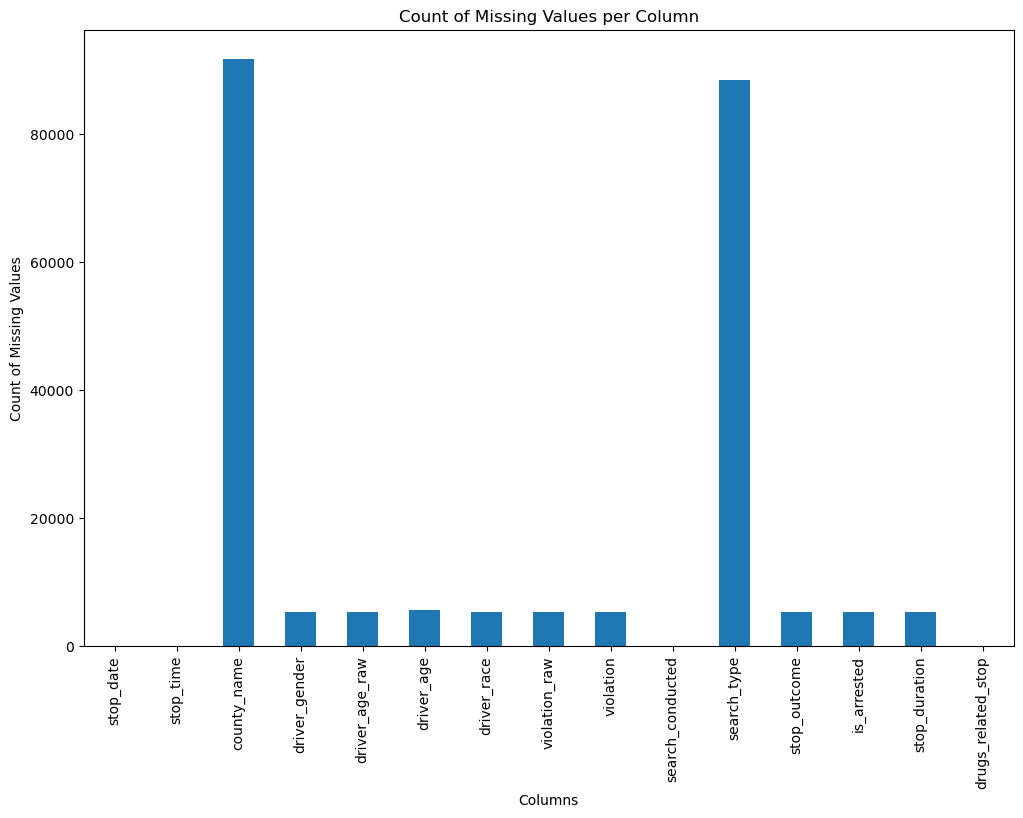

In [39]:
#  Bar Plot of Missing Values
plt.figure(figsize=(12, 8))
missing_data.plot(kind='bar')
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()

Data Distribution and Visualization

Numerical Data Distribution:

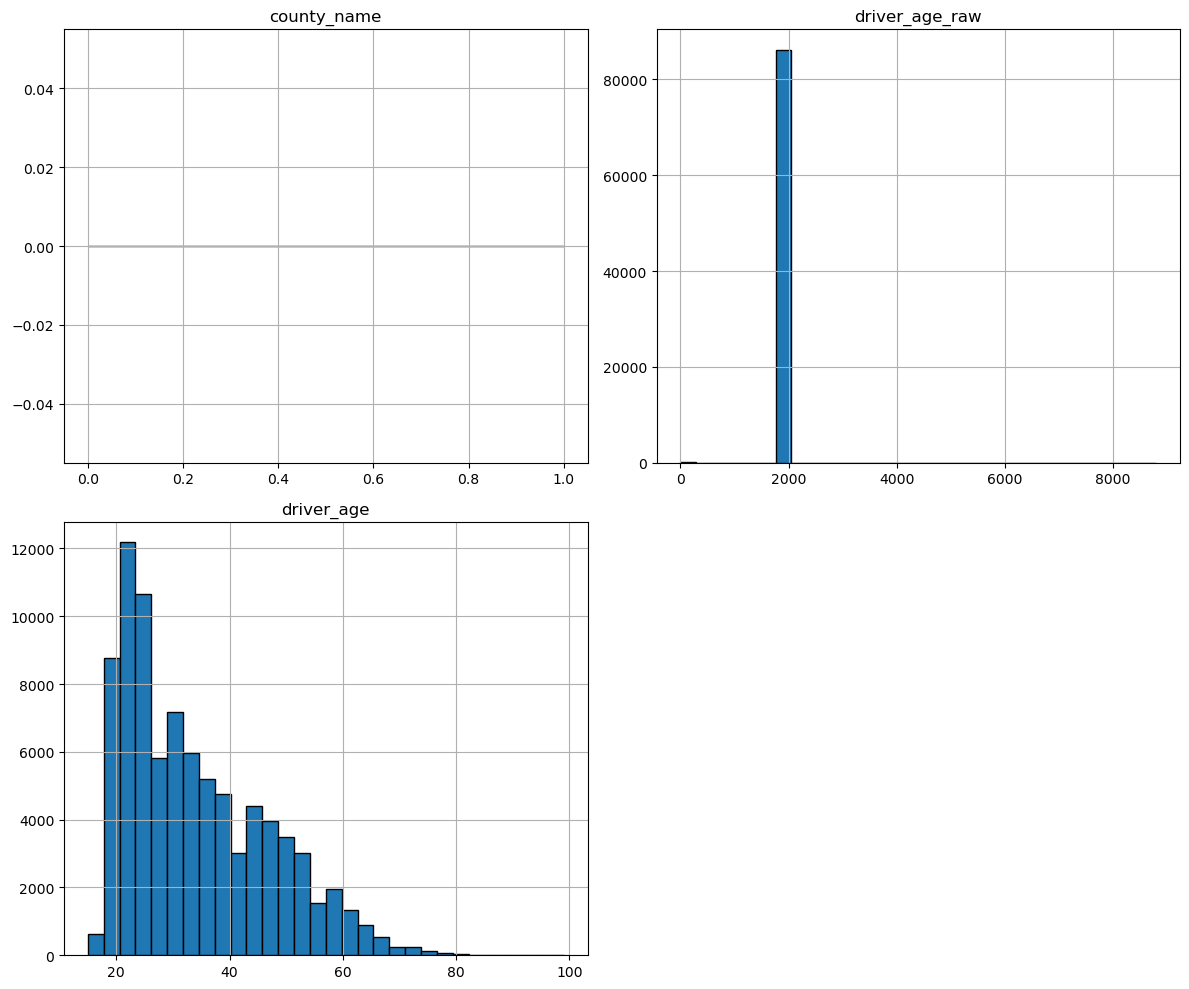

In [40]:
# Histograms for numerical columns
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

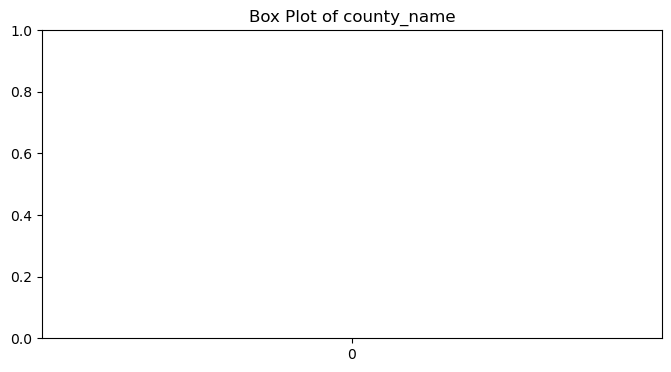

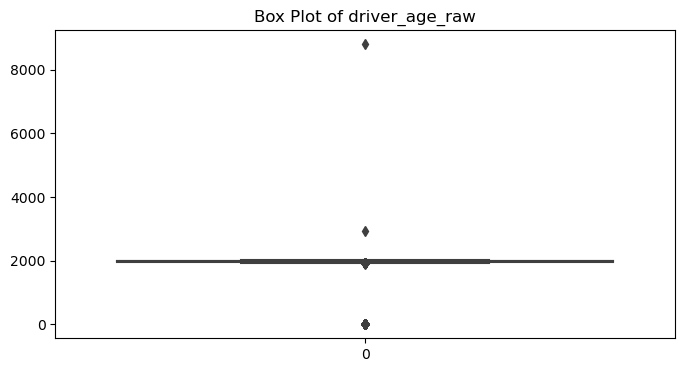

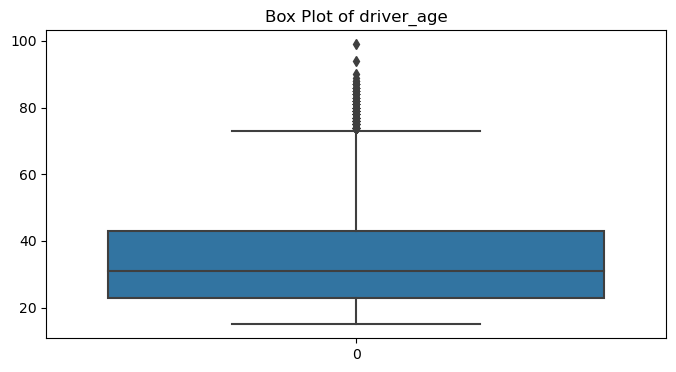

In [41]:
# Box plots for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Categorical Data Distribution:

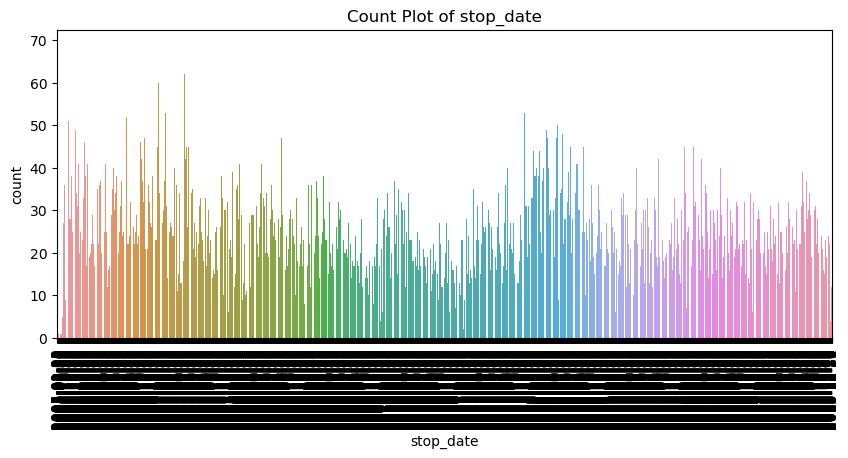

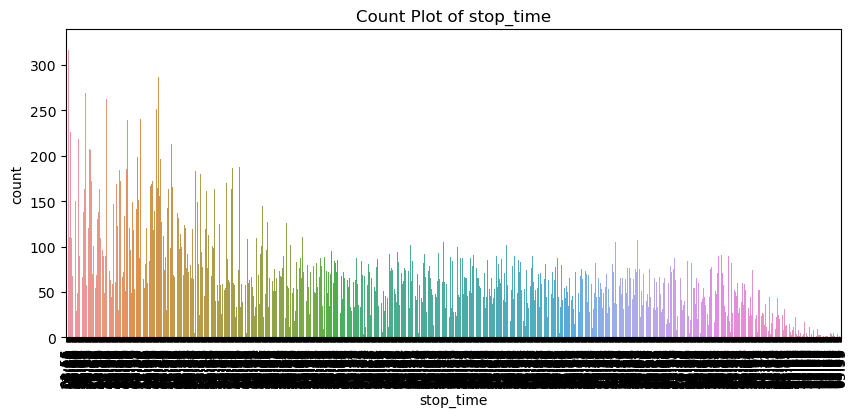

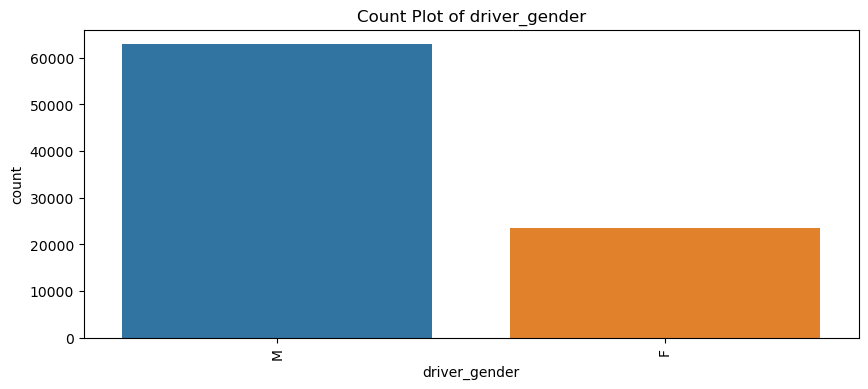

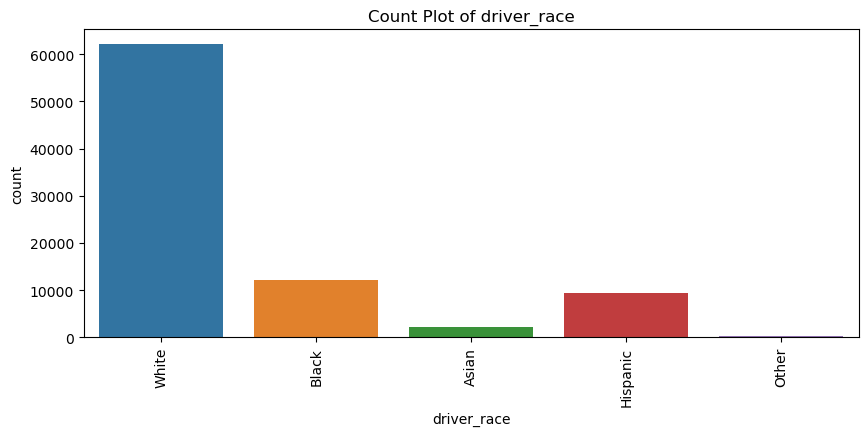

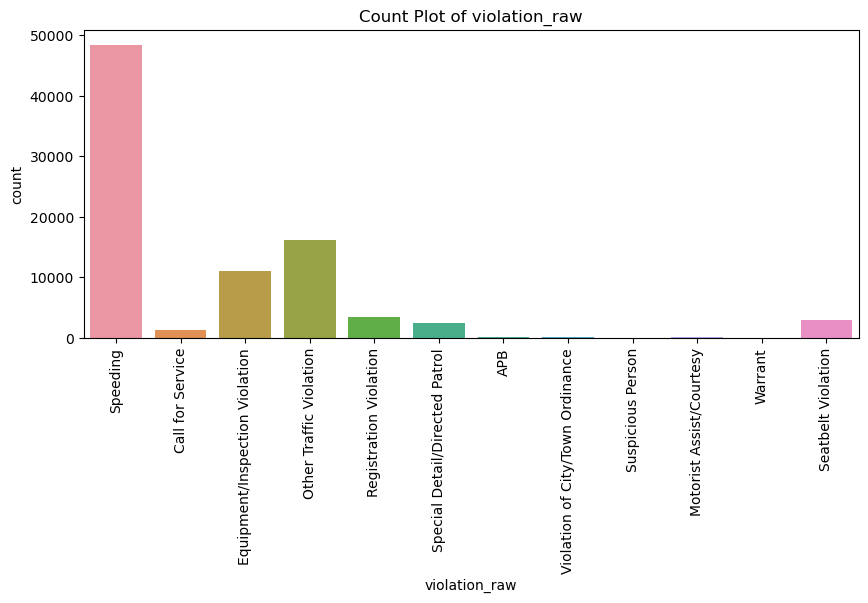

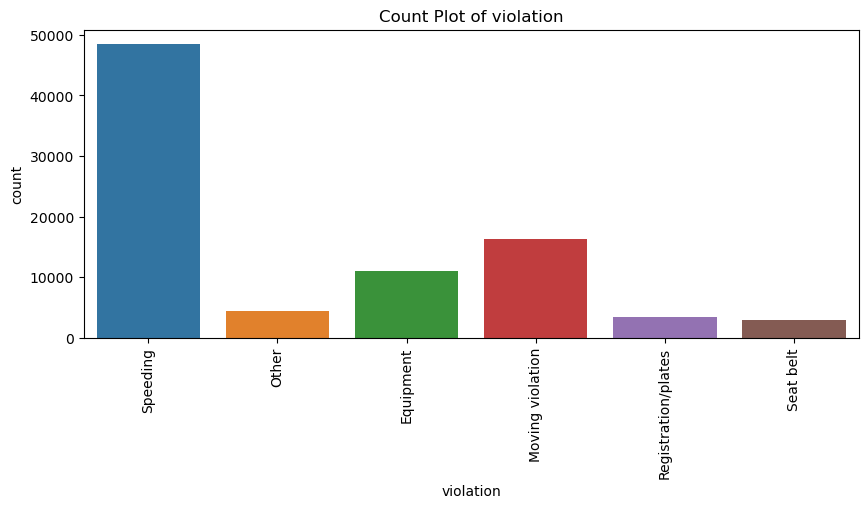

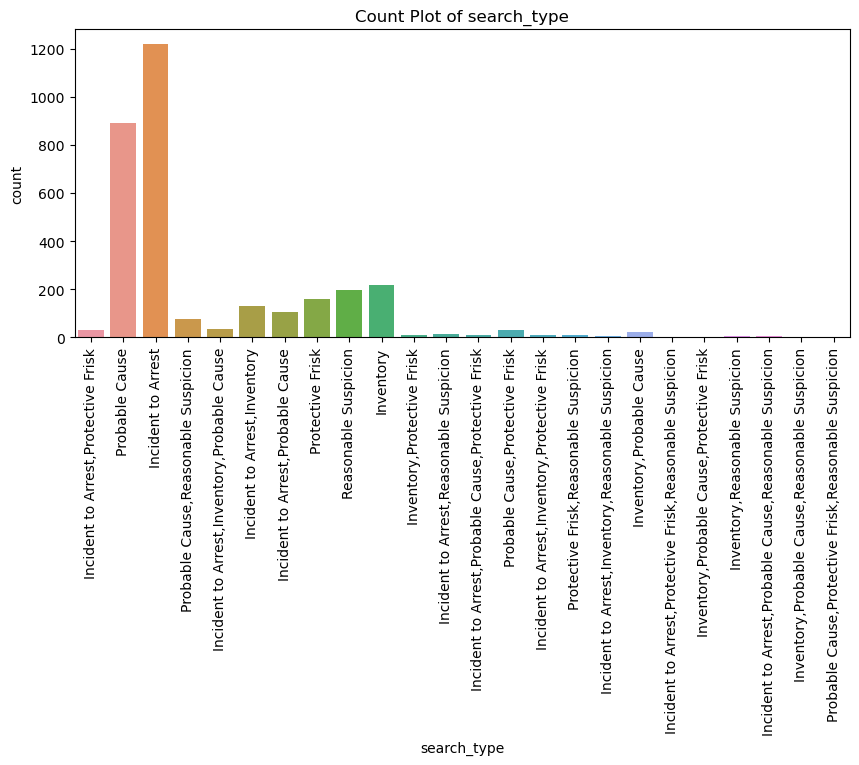

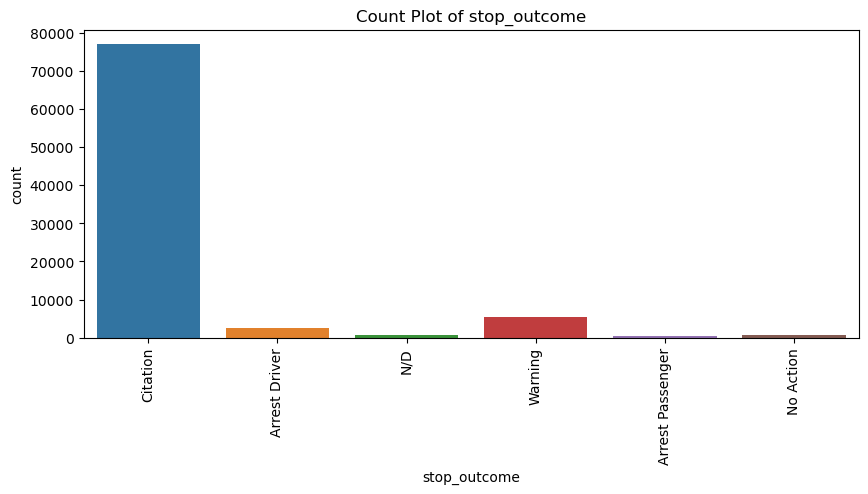

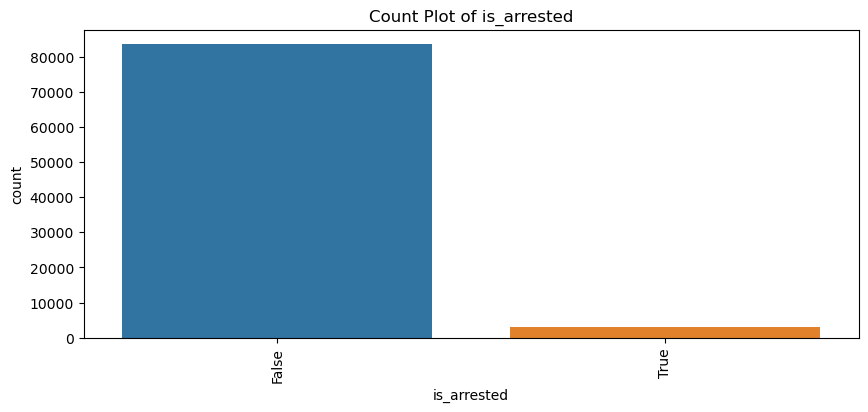

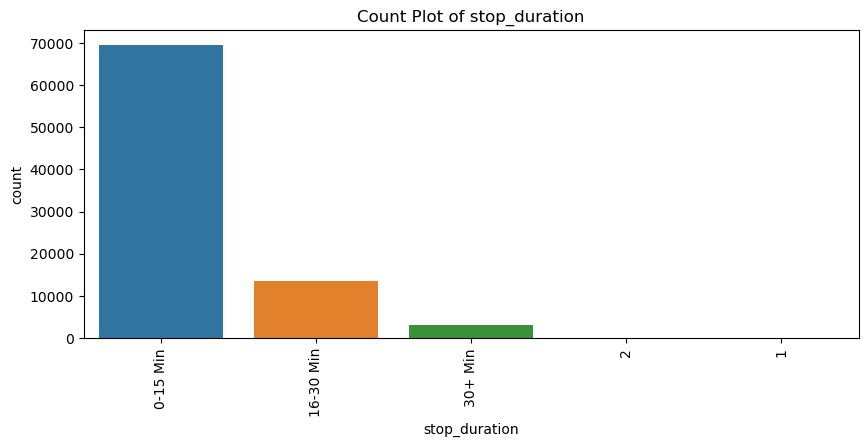

In [42]:
# Count plots for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()


Correlation Analysis

Examine correlations between numerical features.

In [7]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])


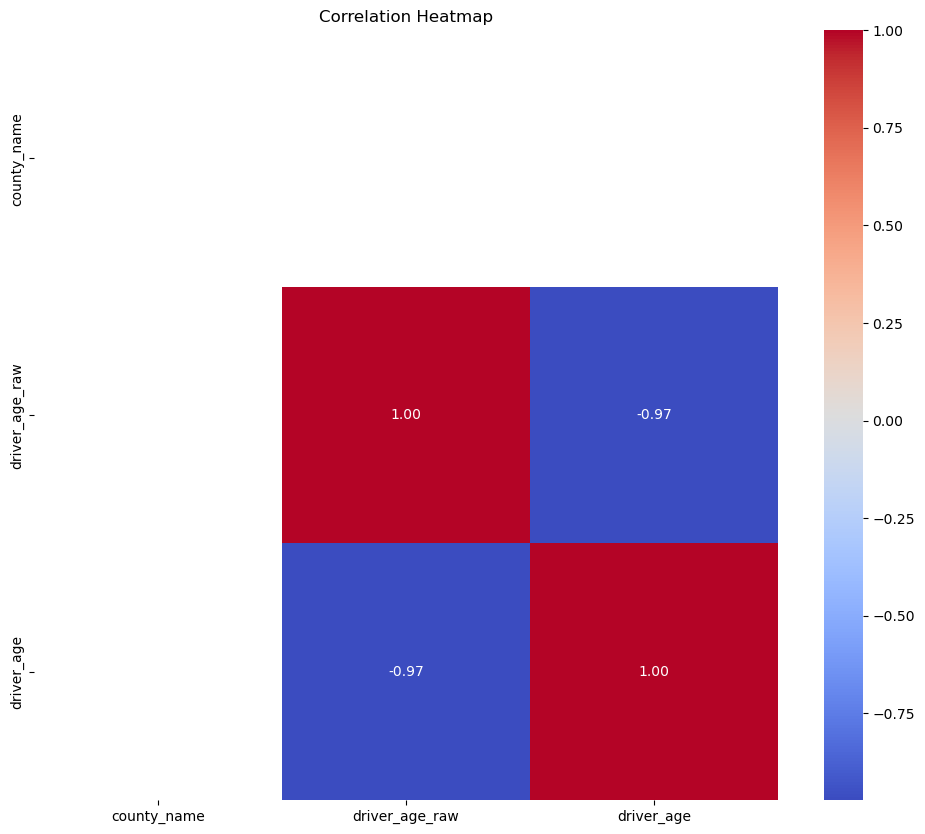

In [46]:
# Compute correlation matrix
corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Convert Dates to Numerical Format:


In [47]:
# Convert 'stop_date' to datetime format
df['stop_date'] = pd.to_datetime(df['stop_date'], errors='coerce')

# Extract features from datetime
df['year'] = df['stop_date'].dt.year
df['month'] = df['stop_date'].dt.month
df['day'] = df['stop_date'].dt.day

# Drop the original date column
df = df.drop(columns=['stop_date'])


In [48]:
df.head()

,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,month,day
0,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2
1,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,18
2,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,23
3,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,2,20
4,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,3,14


Plot relationship between driver_gender and is_arrested

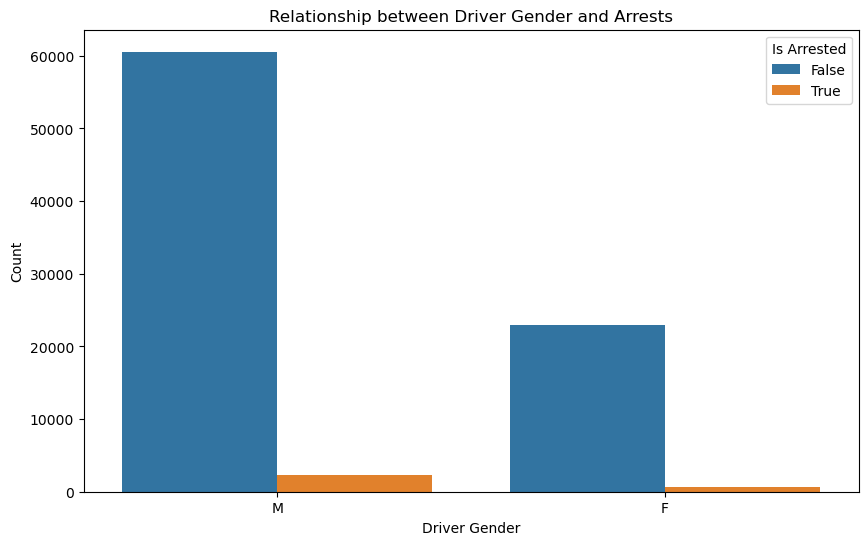

In [44]:

plt.figure(figsize=(10, 6))
sns.countplot(x='driver_gender', hue='is_arrested', data=df)
plt.title('Relationship between Driver Gender and Arrests')
plt.xlabel('Driver Gender')
plt.ylabel('Count')
plt.legend(title='Is Arrested', loc='upper right')
plt.show()

Identify Outliers

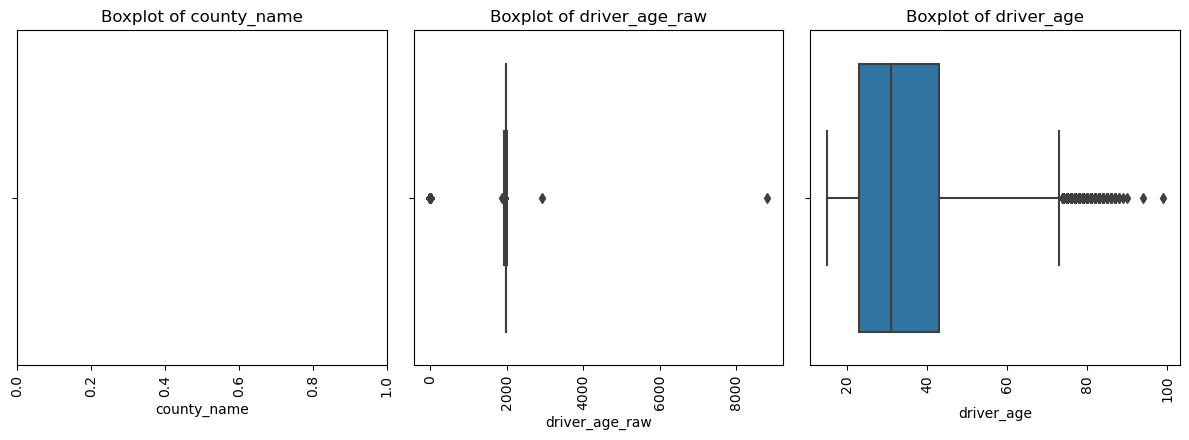

In [10]:
# Plot boxplots for numerical columns to detect outliers
plt.figure(figsize=(12, 8))

# Loop through numerical columns to create boxplots
for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns) // 3 + 1, 3, i + 1)
    sns.boxplot(data=numeric_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Z-Scores

The Z-score method can also be used to identify outliers. It measures how many standard deviations a data point is from the mean.

In [9]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Set a threshold for identifying outliers (e.g., 3 standard deviations from the mean)
threshold = 3
outliers = (z_scores > threshold).astype(int)

# Check number of outliers per column
outlier_counts = pd.DataFrame(outliers, columns=numeric_df.columns).sum()
print(outlier_counts)


county_name       0
driver_age_raw    0
driver_age        0
dtype: int64


Univariate Analysis

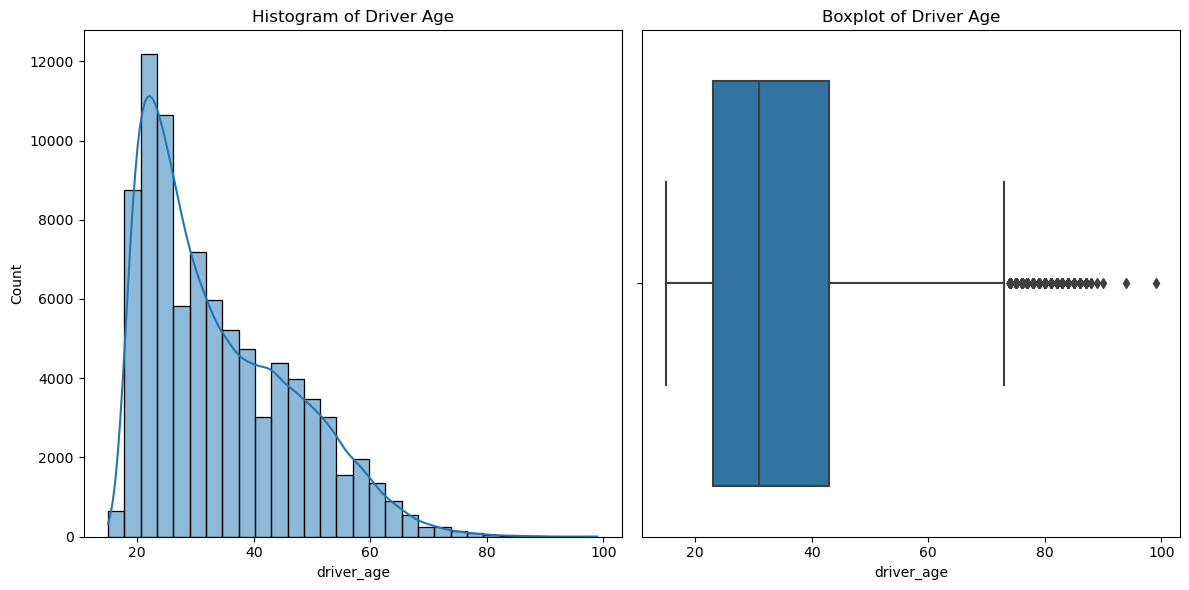

In [15]:
# For Numerical Variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['driver_age'], kde=True, bins=30)
plt.title('Histogram of Driver Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['driver_age'])
plt.title('Boxplot of Driver Age')

plt.tight_layout()
plt.show()


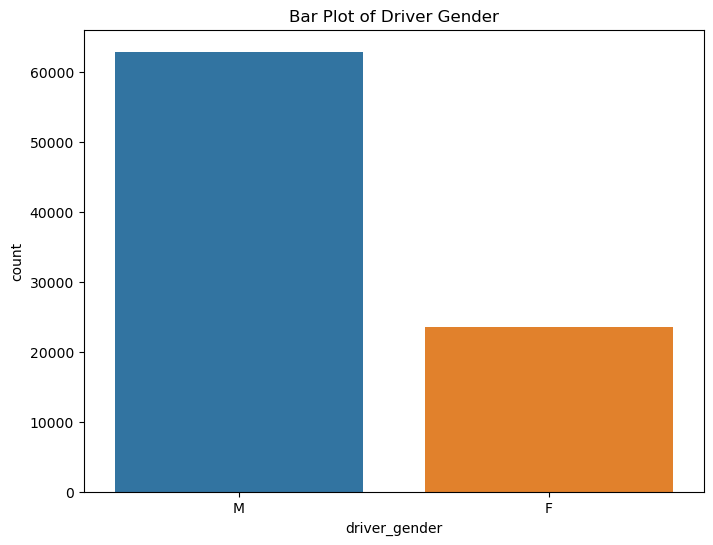

In [16]:
# For Categorical Variables
plt.figure(figsize=(8, 6))
sns.countplot(x='driver_gender', data=df)
plt.title('Bar Plot of Driver Gender')
plt.show()

Bivariate Analysis

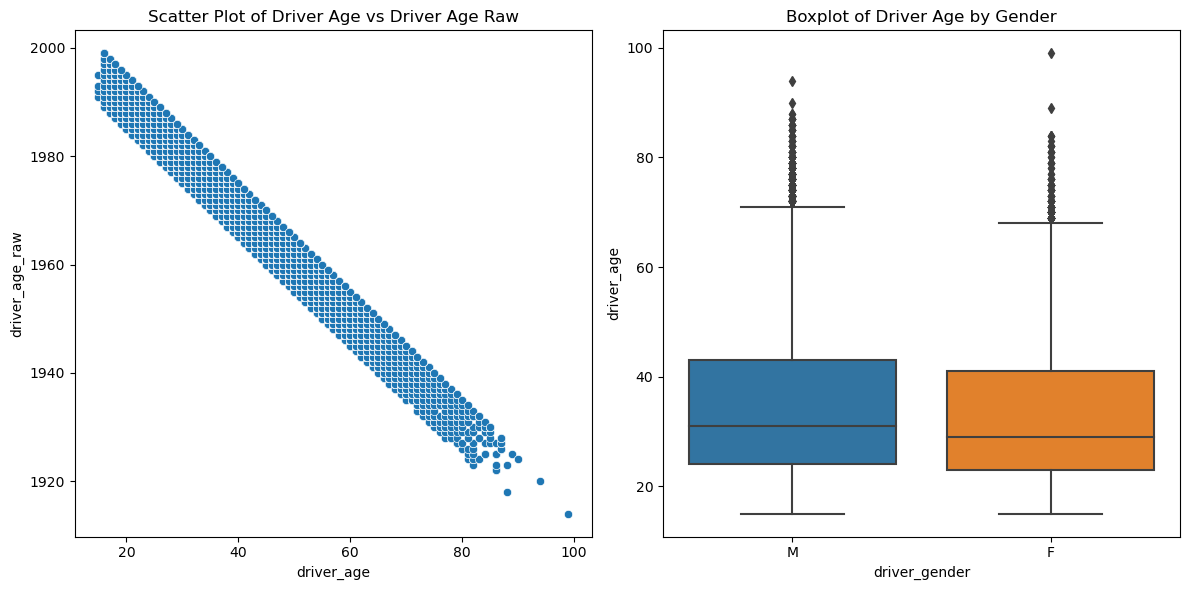

In [17]:
plt.figure(figsize=(12, 6))

# Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='driver_age', y='driver_age_raw', data=df)
plt.title('Scatter Plot of Driver Age vs Driver Age Raw')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='driver_gender', y='driver_age', data=df)
plt.title('Boxplot of Driver Age by Gender')

plt.tight_layout()
plt.show()


DIST PLOT

D:\SAMAANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


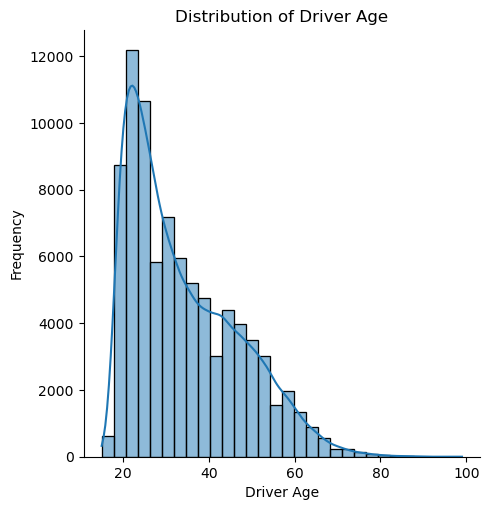

In [20]:
# Create a distribution plot for the 'driver_age' column
sns.displot(df['driver_age'].dropna(), kde=True, bins=30)

# Add titles and labels
plt.title('Distribution of Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')

plt.show()

# Data Preprocessing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91741 non-null  datetime64[ns]
 1   stop_time           91741 non-null  object        
 2   county_name         0 non-null      float64       
 3   driver_gender       86406 non-null  object        
 4   driver_age_raw      86414 non-null  float64       
 5   driver_age          86120 non-null  float64       
 6   driver_race         86408 non-null  object        
 7   violation_raw       86408 non-null  object        
 8   violation           86408 non-null  object        
 9   search_conducted    91741 non-null  bool          
 10  search_type         3196 non-null   object        
 11  stop_outcome        86408 non-null  object        
 12  is_arrested         86408 non-null  object        
 13  stop_duration       86408 non-null  object    

In [22]:
df.describe()

,stop_date,county_name,driver_age_raw,driver_age
count,91741,0.0,86414.000000,86120.000000
mean,2010-10-05 14:05:41.317404416,NaN,1970.491228,34.011333
min,2005-01-02 00:00:00,NaN,0.000000,15.000000
25%,2008-01-10 00:00:00,NaN,1967.000000,23.000000
50%,2010-11-04 00:00:00,NaN,1980.000000,31.000000
75%,2013-05-09 00:00:00,NaN,1987.000000,43.000000
max,2015-12-31 00:00:00,NaN,8801.000000,99.000000
std,NaN,NaN,110.914909,12.738564


In [23]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [24]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Data Cleaning

Check & Remove duplicates

In [25]:
 print(df.duplicated().to_string())

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16        True
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [26]:
# To get the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 479


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# To get the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Drop null values

Check null percentage 

In [29]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the percentage of missing data per column
print(missing_percentage)


county_name           100.000000
search_type            96.507857
driver_age              5.927988
driver_gender           5.615700
driver_race             5.613508
violation_raw           5.613508
violation               5.613508
stop_outcome            5.613508
is_arrested             5.613508
stop_duration           5.613508
driver_age_raw          5.606934
stop_date               0.000000
stop_time               0.000000
search_conducted        0.000000
drugs_related_stop      0.000000
dtype: float64


In [30]:
# Example: Find columns with more than 50% missing values
high_missing_cols = missing_percentage[missing_percentage > 50].index
print(f"Columns with more than 50% missing data: {list(high_missing_cols)}")


Columns with more than 50% missing data: ['county_name', 'search_type']


Visualize missing values

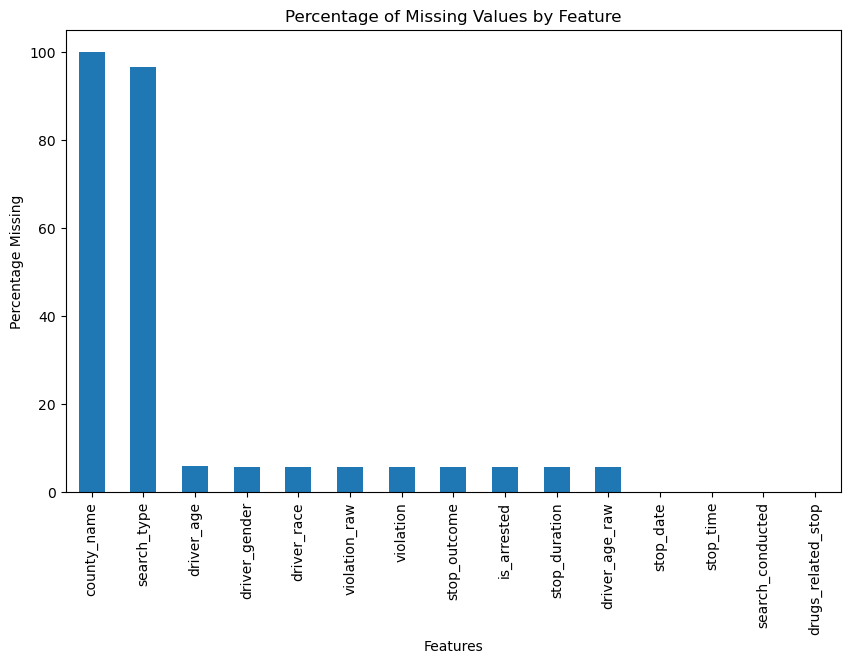

In [31]:
import matplotlib.pyplot as plt

# Plot the percentage of missing data
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage Missing')
plt.show()


 Drop Columns with More Than 50% Missing Values:

In [32]:
# Define the threshold
threshold = 0.5

# Drop columns with more than 50% missing values
df = df[df.columns[df.isnull().mean() < threshold]]

In [33]:
df.isnull().sum()

stop_date                0
stop_time                0
driver_gender         5125
driver_age_raw        5117
driver_age            5410
driver_race           5123
violation_raw         5123
violation             5123
search_conducted         0
stop_outcome          5123
is_arrested           5123
stop_duration         5123
drugs_related_stop       0
dtype: int64

In [34]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [35]:
# Impute missing values in categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [36]:
# Impute missing values in numerical columns with mean
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [37]:
print(df.isnull().sum().to_string())

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0


The analysis began with an exploration of the dataset to identify missing values, followed by visualizations to understand data distributions. Key steps included summarizing numerical and categorical statistics, detecting and visualizing missing values, and examining correlations between numerical features. Dates were converted to numerical formats, and outliers were identified using boxplots and Z-scores. The dataset underwent data cleaning, including handling duplicates, imputing missing values, and removing columns with excessive missing data, ensuring a clean dataset for further analysis.